In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [19]:
from IPython.html import widgets
from IPython.html.widgets import interact

In [3]:
image_file = '../data/data.fits'

In [5]:
import os
print("Does this file exist: " ,os.path.isfile(image_file))

Does this file exist:  True


In [6]:
import pyfits

In [8]:
o_fits = pyfits.open(image_file)
o_fits_0 = o_fits[0]

## Display Image

In [9]:
data = o_fits_0.data

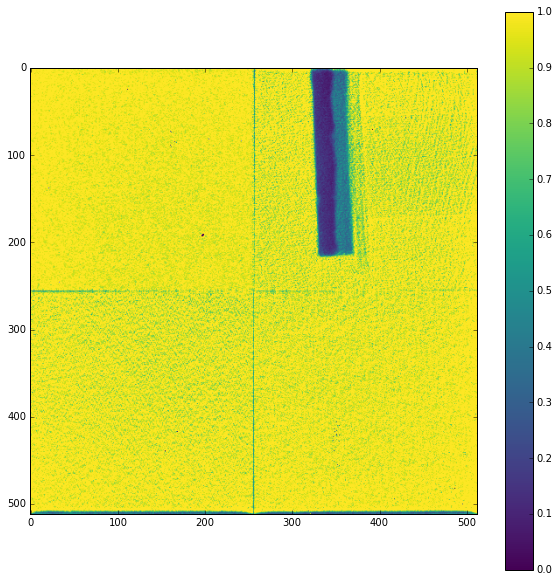

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(data, cmap='viridis')
plt.colorbar()

## Select Cropping Region

In [21]:
height, width = data.shape

In [52]:
def plot_image_with_crop_region(x_left, x_right, y_top, y_bottom):

    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data, cmap='viridis')
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)   
    
    return [x_left, x_right, y_top, y_bottom]

[112, 511, 0, 511]

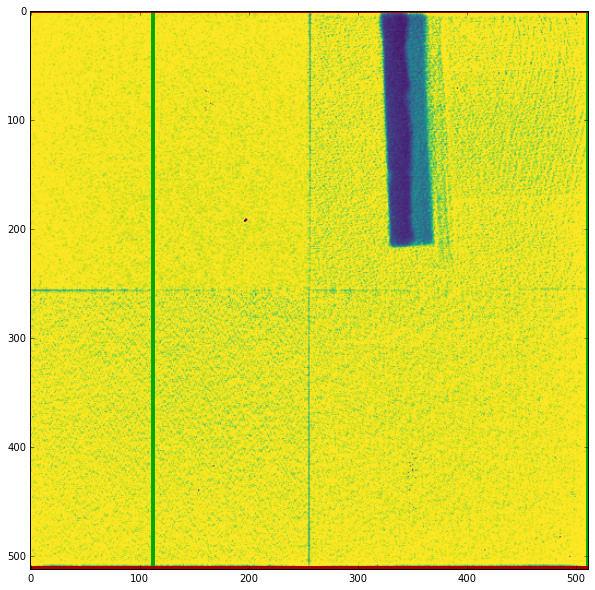

In [53]:
crop = interact(plot_image_with_crop_region, 
        x_left = widgets.IntSlider(min=0, max=width-1, step=1, value=0),
        x_right = widgets.IntSlider(min=0, max=width-1, step=1, value=width-1),
        y_top = widgets.IntSlider(min=0, max=height-1, step=1, value=0), 
        y_bottom = widgets.IntSlider(min=0, max=height-1, step=1, value=height-1))

## Crop Image

In [60]:
[x_left, x_right, y_top, y_bottom] = crop.widget.result
print('Region Selected:')
print('  left : %d' %x_left)
print('  right: %d' %x_right)
print('    top: %d' %y_top)
print(' bottom: %d' %y_bottom)

Region Selected:
  left : 112
  right: 511
    top: 0
 bottom: 511


In [67]:
data_cropped = data[y_top: y_bottom, x_left: x_right]
print(data_cropped.shape)

(511, 399)


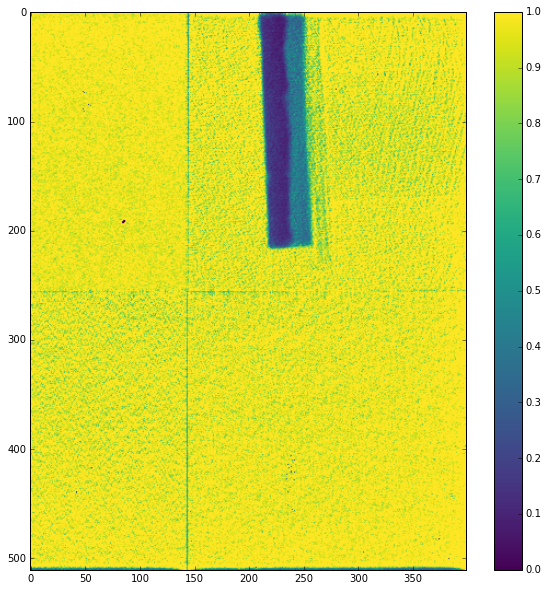

In [69]:
#test
plt.figure(figsize=(10,10))
plt.imshow(data_cropped, cmap='viridis')
plt.colorbar()



## Save Image into Tiff File

In [70]:
from PIL import Image
import numpy as np

In [71]:
output_image_file = '../data/data_cropped.tiff'

In [72]:
new_image = Image.fromarray(np.float32(data_cropped))

In [73]:
new_image.save(output_image_file)